## Q1. Run K-mean clustering with 3 clusters and visualize results using a pairplot with each cluster highlighted different color.

In [1]:
# Importing libraries
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# importing pandas to read the excel file in notebook
import pandas as pd

# importing os library to change the current working directory
import os
os.getcwd()
os.chdir('C:\\Users\\ankit\\Desktop\\HW6')

#Importing data from downloaded excel file in Jupyter notebook as Data Frames
newdf=pd.read_csv("data.csv" )

#Displaying the dataframe for verification/QC
newdf.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5
0,1.915140,-2.018016,-1.413416,-0.202361,-0.408770
1,-0.774208,-1.611544,-0.466933,0.102410,-1.127966
2,-0.719272,2.210270,0.608990,1.001067,0.163401
3,-1.058535,1.428571,-0.206419,-0.180898,1.033282
4,-1.118775,-1.326224,-0.399313,0.123903,-0.786953


In [3]:
#Formatting the data set
rel_cols=['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4','Attribute5']

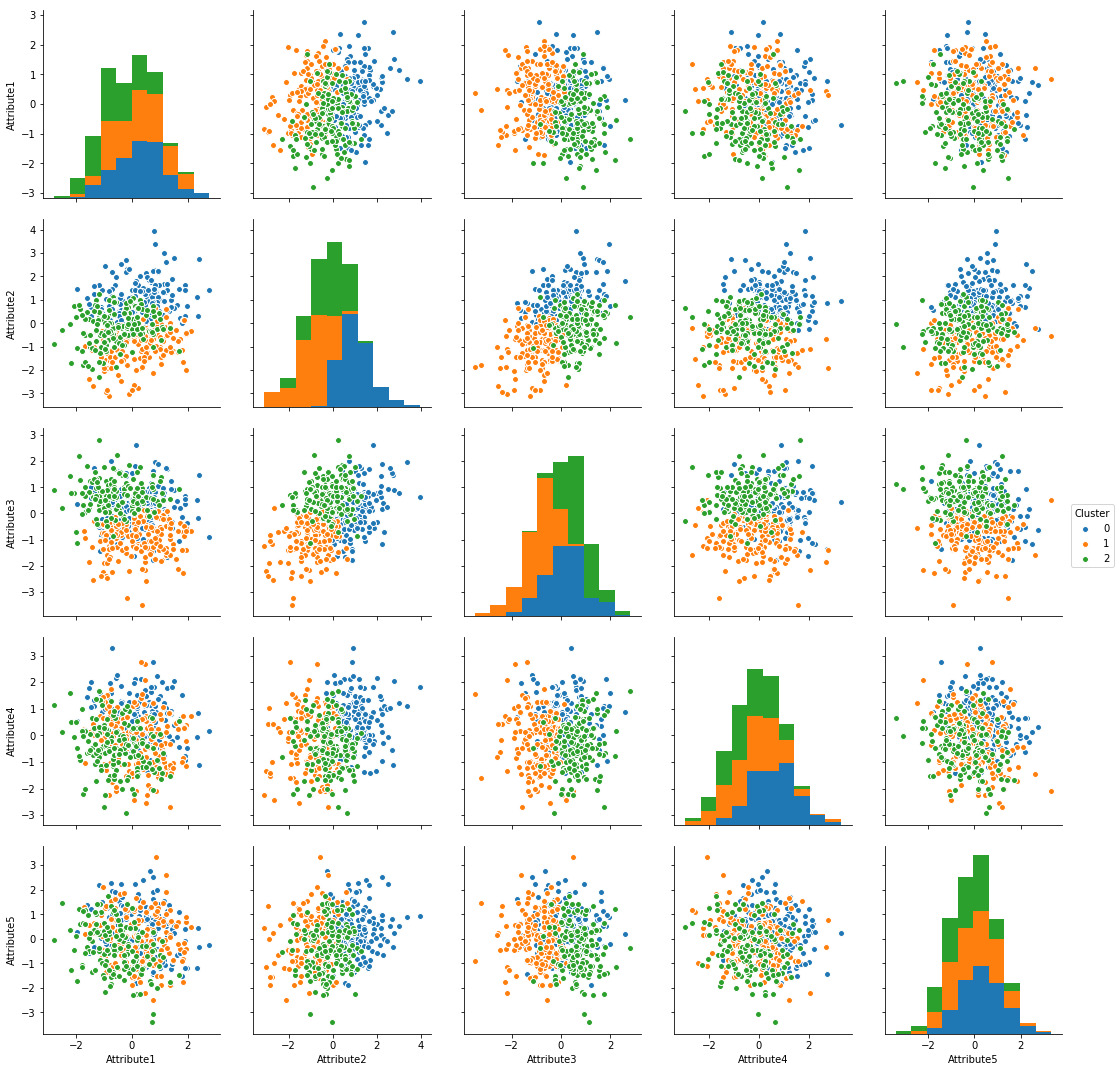

In [4]:
#Using sklearn to plot KMeans clustering results
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3).fit(newdf)
newdf['Cluster']=kmeans.labels_
g = sns.pairplot(x_vars=rel_cols, y_vars=rel_cols, data=newdf, hue="Cluster", size=3)

## Q2 Identify number of clusters using the elbow method. Plot Num Clusters vs SSE for Num Clusters ∈ {2,3,4,5,6,7,8,9,10}.

In [5]:
#Importing libraries
from sklearn.cluster import KMeans

#Determining range of clusters
nClusters=range(2,10)
sumDistances=[]
for n in nClusters:
    kmeans=KMeans(n_clusters=n).fit(newdf[rel_cols])
    sumDistances.append(kmeans.inertia_) #Proxy for SSE

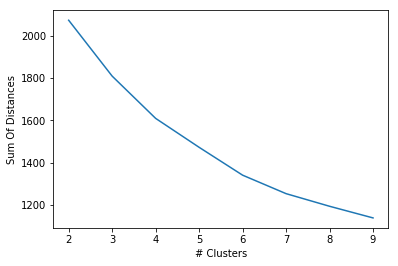

In [6]:
#Plotting the elbow graph
plt.plot(nClusters,sumDistances,'-')
plt.xlabel('# Clusters')
plt.ylabel('Sum Of Distances')
plt.show()

In [ ]:
# From the graph we see that there is no clear evidence of number of clusters as the graph obtained from the elbow method does
# not have a sharp point turn

## Q3. Investigate what happens to the run time when we vary number of observations? (𝑚). Plot number of observations on the x-axis and time it took to run it on the y-axis. Provide a linear, log𝑛, and 𝑛log𝑛 benchmarks for comparison.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Generating a linear model with n coefficients: n-1 indep variables + intercept
def linearModel(n):     
    return np.random.rand(n, 1)


#Generates 'm' observations for a linear model whose coefficients are given in 'beta'.
def simulateData(m, beta, eps=1.0/(2**0.5)):
    n = len(beta) #Get number of coefficients
    X = np.random.rand(m, n) #Get m values for each of the independent variables
    X[:, 0] = 1.0 #The first indep variable is 1
    e = eps*np.random.randn(m, 1) #Get some random noise
    y = np.dot(X,beta) + e #generate the depended variable
    return (X, y)


#Solve for the coefcient of linear regression
def runRegression(X, y):
    result = np.linalg.lstsq(X, y, rcond=-1)
    b = result[0]
    return b

In [3]:
#Will write a simple function to measure time. 
#The function takes three arguments: fun, arg1, and arg2. 
import time 

def measureTime(fun,arg1,arg2):
    nTimes=50
    times=np.zeros(nTimes)
    for i in range(nTimes):
        startTime = time.time()    
        fun(arg1,arg2)
        endTime = time.time()
        times[i]=endTime-startTime
    return np.mean(times)

In [4]:
# Varying the number of observations
m = np.geomspace(start=1000,stop=1000000,num=30,dtype=int) 
N = 3 # number of independent variables is fixed 

times = np.zeros(len(m)) # create an array to store measured times in
for (i, n) in enumerate(m):
    beta_true = linearModel(N)
    (X, y) = simulateData(n, beta_true, eps=0.2)
    t = measureTime(runRegression, X, y)
    times[i] = t

In [5]:
#Checking the vlaues of times obtained
print(times)

[1.50403976e-04 1.20191574e-04 1.22823715e-04 5.98239899e-05
 1.31859779e-04 1.45726204e-04 2.53214836e-04 3.14388275e-04
 4.35142517e-04 3.58738899e-04 3.47943306e-04 2.98256874e-04
 3.35407257e-04 6.70742989e-04 6.89868927e-04 1.02477551e-03
 2.18464851e-03 3.08972836e-03 3.84853840e-03 5.86006165e-03
 7.38562584e-03 1.04778910e-02 1.33956957e-02 1.73441172e-02
 2.17183113e-02 2.96098566e-02 3.67509174e-02 4.86318302e-02
 6.33826065e-02 8.13267183e-02]


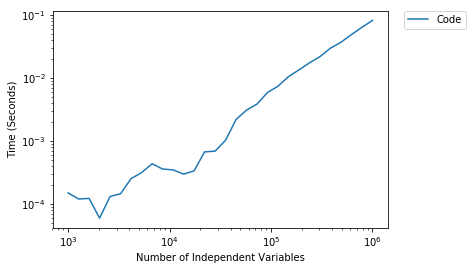

In [6]:
# Plotting graph between Time & # Independent variables 
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.loglog (m, times, '-',label="Code")
plt.xlabel('Number of Independent Variables')
plt.ylabel('Time (Seconds)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

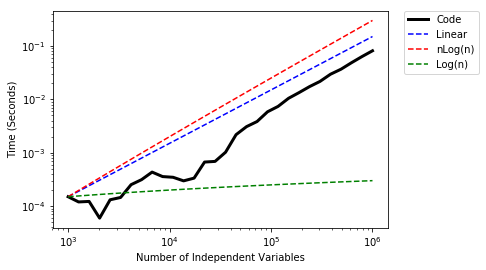

In [7]:
#Create benchmarks
# Benchmarks is linear, Log and nLogn 
linearTime = [times[0]/m[0]*n for n in m]
nlognTime = [times[0]/(m[0]*np.log(m[0]))*(n*(np.log(n))) for n in m]
lognTime = [times[0]/(np.log(m[0]))*(np.log(n)) for n in m]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.loglog (m, times, 'k-',linewidth=3,label="Code")

#Plot benchmarks
ax1.loglog (m, linearTime, 'b--',label="Linear")
ax1.loglog (m, nlognTime, 'r--',label="nLog(n)")
ax1.loglog (m, lognTime, 'g--',label="Log(n)")

plt.xlabel('Number of Independent Variables')
plt.ylabel('Time (Seconds)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()